In [18]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
from sklearn.datasets import load_iris

In [20]:
iris = load_iris()

In [21]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
x = iris.data
y = iris.target

#### 從上面可知petal length和petal width與class有高correlation，所以選用後兩項features做預測

In [23]:
X = x[:,2:]
Y = y

### 區分訓練資料、測試資料

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [26]:
from sklearn.svm import SVC

In [27]:
clf = SVC(gamma='auto')
clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)

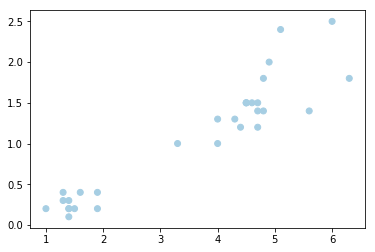

In [30]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict-y_test,cmap='Paired')

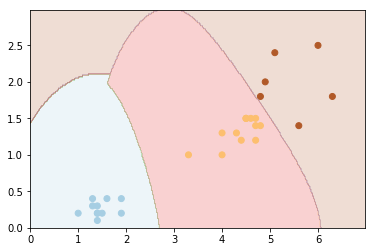

In [37]:
x0 = np.arange(0,7,0.02)
y0 = np.arange(0,3,0.02)

xm,ym = np.meshgrid(x0,y0)
P = np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm,ym,Z,cmap='Paired',alpha=0.2)

plt.scatter(x_test[:,0],x_test[:,1],cmap="Paired",c=y_predict)